# Data Cleaning for EC1B1

In [ ]:
# pip install openpyxl is used to install a module that allows us to read excel files into jupyter 

In [ ]:
pip install openpyxl


In [ ]:
# Installing modules for plotting graphs, pandas for the dataframe,numpy for data analsysis, 
# json in case I need it.
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import json 


In [60]:
# use pd.read_excel() function to import excel files containing raw data from IFS into 
# pandas dataframes in the jupyter notebook.
# Stored in separate variables for each of the dataframes: US data and Spain data (our country)
df_US = pd.read_excel('../US.xlsx')
df_Spain = pd.read_excel('../Spain.xlsm')


In [ ]:
# Renaming columns of the dataframe for the US.
df_US = df_US.rename(columns={'Unnamed: 1': 'Month series', 'Unnamed: 2':'International Reserves',\
                               'Unnamed: 3': 'Consumer Price Index'})
df_US

In [119]:
# Renaming columns of the dataframe for Spain 
df_Spain = df_Spain.rename(columns = {'Unnamed: 1': 'Month series', 'Unnamed: 2': 'Industrial Production Index',\
'Unnamed: 3': 'Exchange Rates', 'Unnamed: 4': 'International Reserves', 'Unnamed: 5': 'Consumer Price Index' })
df_Spain

,International Financial Statistics (IFS),Month series,Industrial Production Index,Exchange Rates,International Reserves,Consumer Price Index
0,NaN,NaN,"Economic Activity, Industrial Production, Index","Exchange Rates, National Currency Per U.S. Dol...","International Reserves and Liquidity, Reserves...","Prices, Consumer Price Index, All items, Index"
1,Spain,Jan 1960,NaN,60.0,233,2.857368
2,Spain,Feb 1960,NaN,60.0,253,2.855049
3,Spain,Mar 1960,NaN,60.0,299,2.851573
4,Spain,Apr 1960,NaN,60.0,326,2.853891
...,...,...,...,...,...,...
368,Spain,Aug 1990,57.138375,97.029,53227.717281,52.200576
369,Spain,Sep 1990,97.803577,98.467,53790.187718,52.750025
370,Spain,Oct 1990,100.909947,95.697,55428.040577,53.218335
371,Spain,Nov 1990,104.110449,93.958,56347.862332,53.165017


In [ ]:
# This is where I construct all the variables
data = {
    'Month series': pd.date_range(start = 'Jan 1960', periods = 372, freq = 'MS'),
    ' Exchange rate value': df_Spain['Exchange Rates'][1:]
}
# Creating a dictionary of values from the dataframes from Spain 
df_month_series = pd.DataFrame(data)
# Convert into pandas 
df_month_series['Exchange rate value'] = pd.to_numeric(df_month_series['Exchange rate value'])
# Convert into a pandas dataframe with month series as index
df_month_series.set_index('Month series', inplace=True)
df_month_series['Monthly Growth in Nominal Exchange Rate'] = df_month_series['Exchange rate value'].pct_change() * 100 
Monthly_growth_in_Nominal_Exchange_Rate = df_month_series['Monthly Growth in Nominal Exchange Rate']
Monthly_growth_in_Nominal_Exchange_Rate
df_month_series['Monthly Growth in Industrial Production'] = df_month_series

In [ ]:
data = {
    'Month series': pd.date_range(start = 'Jan 1960', periods = 372, freq = 'MS'),
    'Exchange rate value': df_Spain['Exchange Rates'][1:]
}
df_month_series = pd.DataFrame(data)
df_month_series['Exchange rate value'] = pd.to_numeric(df_month_series['Exchange rate value'][1:])
df_month_series.set_index('Month series', inplace=True)
df_month_series['Monthly Growth in Nominal Exchange Rate'] = df_month_series['Exchange Rate Value'].pct_change() * 100 
# Plot monthly time series
plt.figure(figsize=(10, 6))
df_month_series['value'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly Time Series')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.show()

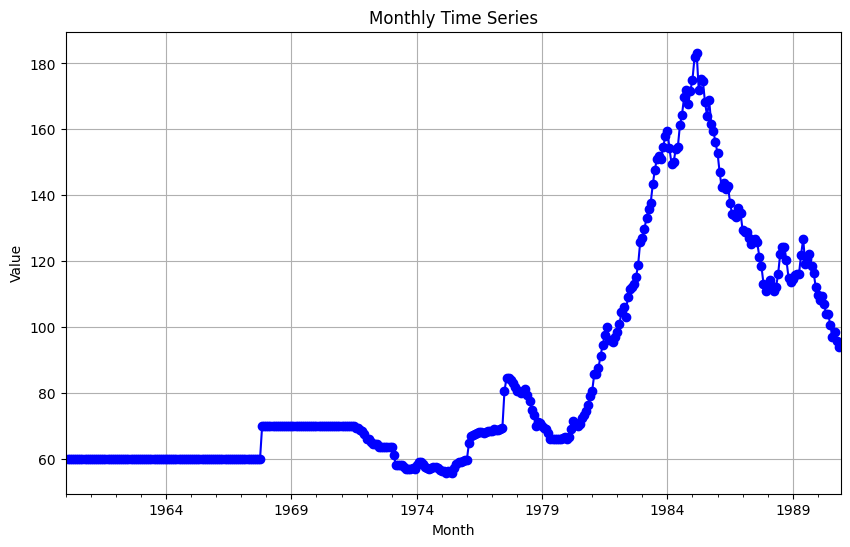

In [102]:
df_month_series.set_index('Month series', inplace=True)

# Plot the monthly time series
plt.figure(figsize=(10, 6))
df_month_series['value'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly Time Series')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.show()

This is where we construct our variables for each of the dataframes

In [ ]:
#Spain's variables 


In [54]:
# This creates a merged dataframe that concatenates and puts Spain on top of the US dataframe
merged_df = pd.concat([df_Spain, df_US], ignore_index=True)

This is where we print out our merged dataframe in full 

In [ ]:
# Already used a line of code merged_df = merged_df.drop(373) to delete redundant row of headers for the US data
# Used the pd.set_option in order to display all 746 rows of the merged dataframe
# In the merged dataframe, there is no data for the year of 1960 in Spain, there is no data at all in the first 12 months
# Therefore, this makes interpolating the data very difficult here and we have left it blank 
# Filled in all the NaN values with '' to make it look nicer.
# Empty columns for the US data is because we only have 2 columns of data - international reserves and CPI per the coursework instructions.
# Any outliers were defined as being +- 3 standard deviations away from the mean of the series
pd.set_option('display.max_rows', 10)
merged_df = merged_df.fillna('')
merged_df